<a href="https://colab.research.google.com/github/jay0010/LGMVIP-DataScience/blob/main/Let_Us_Grow_More_Task_Iris_Flowers_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name :  Jayan Kokru**

# **LETS GROW MORE VIRTUAL INTERNSHIP PROGRAM(VIP)**


# **BEGINNER LEVEL TASK**

# Iris Flowers Classification ML Project :

 This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.**

### Dataset : http://archive.ics.uci.edu/ml/datasets/Iris

# **Importing Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import datasets,model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()


In [ ]:
plt.rcParams['figure.figsize']=(15,9)

# **Importing Datasets**

In [ ]:
data = datasets.load_iris()

In [ ]:
x = data['data']
y = data['target']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


# **Division of Data into Training And Testing Sets**

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, train_size=0.8,random_state=15)

# **Plotting of Training Data**

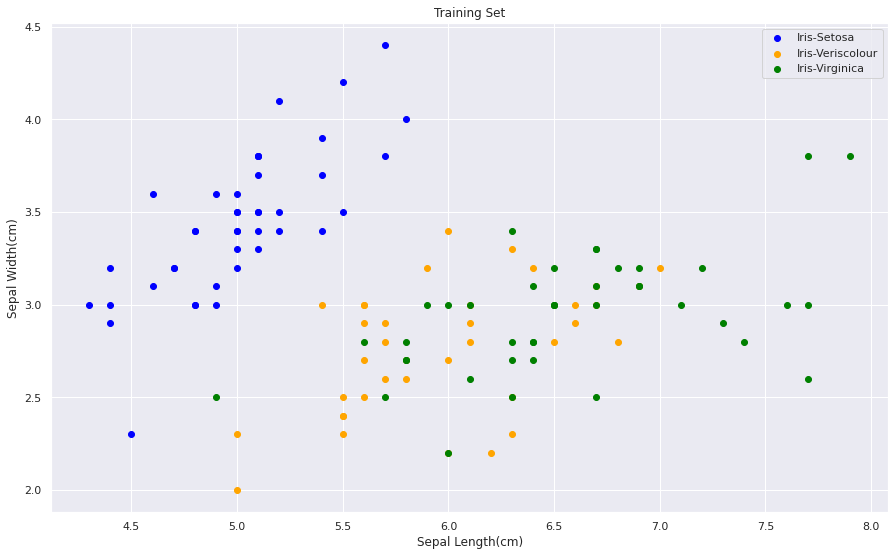

In [ ]:
labels={0: "Iris-Setosa",1:'Iris-Veriscolour',2:'Iris-Virginica'}
label_colours = ['blue','orange','green']

def plot_data(x,y,labels,colours,a=0,b=1,title='Training Set'):
  for c in np.unique(y):
    inx = np.where(y == c)
    plt.scatter(x[inx,a], x[inx,b], label=labels[c],c=colours[c])
  plt.title(title)
  plt.xlabel("Sepal Length(cm)")
  plt.ylabel("Sepal Width(cm)")
  plt.legend()

plt.figure(figsize=(15,9))
plot_data(x_train, y_train, labels, label_colours)
plt.show()

# **TRAINING OF FULL DATASET**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
tf.keras.backend.clear_session()
mlp = Sequential([
                  Dense(3,input_shape=(4,),activation='softmax')])
mlp.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history =mlp.fit(x_train,y_train,validation_split=0.1,batch_size=16, epochs=1000, verbose=0)

In [ ]:
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.989624,0.203704,2.789009,0.166667
1,1.957583,0.212963,2.749975,0.166667
2,1.926435,0.212963,2.710755,0.166667
3,1.895319,0.212963,2.671582,0.166667
4,1.865010,0.212963,2.632012,0.166667


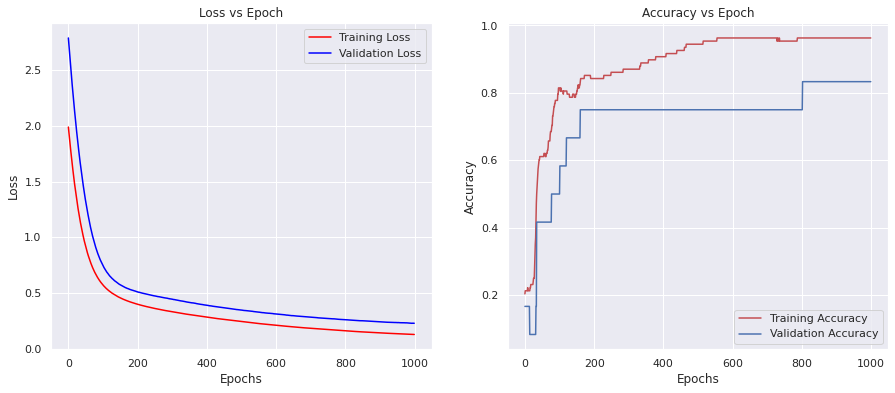

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(df['loss'],c='red',label='Training Loss')
plt.plot(df['val_loss'],c='blue',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'],c='r',label='Training Accuracy')
plt.plot(df['val_accuracy'],c='b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()

plt.show()



In [ ]:
mlp.evaluate(x_train,y_train)

4/4 [==============================] - 0s 3ms/step - loss: 0.1384 - accuracy: 0.9500


[0.13844773173332214, 0.949999988079071]

In [ ]:
print(f'Test Accuracy : (mlp.evaluate(x_test,y_test)[1]:  .2%)')

Test Accuracy : (mlp.evaluate(x_test,y_test)[1]:  .2%)


# **DATASET(SEPAL)**

In [ ]:
x_train, x_test, y_train,y_test = model_selection.train_test_split(x[:, :2],y,train_size=0.8,random_state=15)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train.shape

(120, 2)

# **ARTIFICIAL NEURAL NETWORK(ANN)**

In [ ]:
tf.keras.backend.clear_session()
classifier = Sequential([
                         Dense(5,input_shape=(2,),activation='relu'),
                         Dense(3,activation='softmax')
])
classifier.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = classifier.fit(x_train,y_train,validation_split=0.1,batch_size=16,epochs=1000,verbose=0)

In [ ]:
df= pd.DataFrame(history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
995,0.388956,0.75,0.456546,0.666667
996,0.389012,0.75,0.456861,0.666667
997,0.388911,0.75,0.456646,0.666667
998,0.388990,0.75,0.456868,0.666667
999,0.388871,0.75,0.456626,0.666667


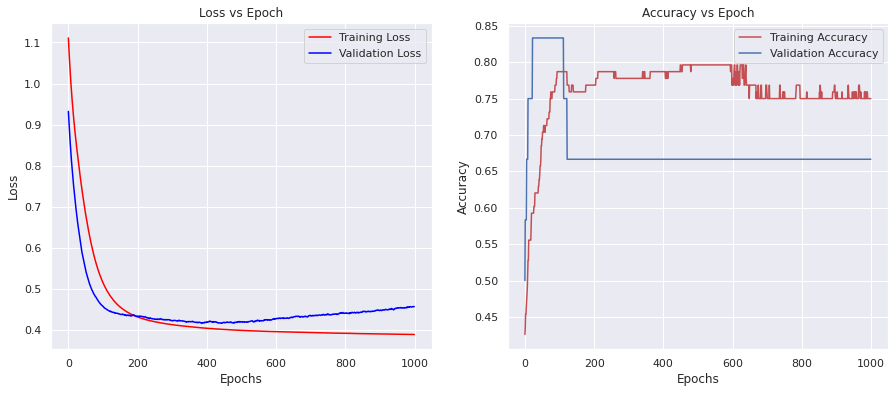

In [ ]:
plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
plt.plot(df['loss'],c='red',label='Training Loss')
plt.plot(df['val_loss'],c='blue',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'],c='r',label='Training Accuracy')
plt.plot(df['val_accuracy'],c='b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()

plt.show()

In [ ]:
print(f'Test Accuracy : (classifier.evaluate(x_test,y_test)[1]:  .2%)')

Test Accuracy : (classifier.evaluate(x_test,y_test)[1]:  .2%)


# **EVALUATE USING CONFUSION MATRIX**

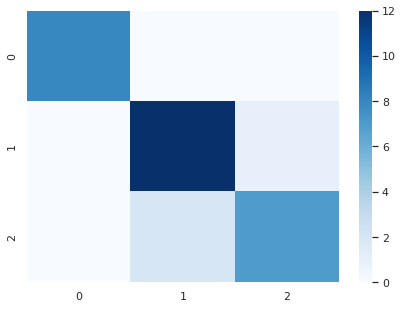

In [ ]:
y_pred = np.argmax(classifier.predict(x_test),axis=1)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap="Blues")

In [ ]:
def get_meshgrid(x0_range,x1_range,num_points=100):
  x0 = np.linspace(x0_range[0],x0_range[1],num_points)
  x1 = np.linspace(x1_range[0],x1_range[1],num_points)
 
  return np.meshgrid(x0,x1)


# **VISUALIZATION**

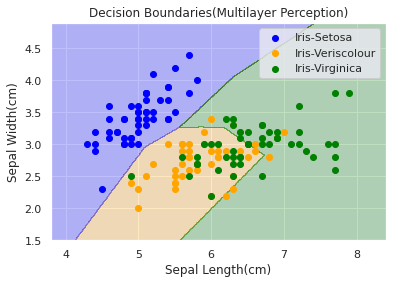

In [ ]:
num_points = 500
x_mesh,y_mesh = get_meshgrid([x[:,0].min() - 0.5,x[:,0].max() +0.5],
                             [x[:,1].min()-0.5,x[:,1].max()+0.5],num_points=num_points)
y_pred = np.argmax(classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)),axis=1).reshape(num_points,num_points)

plt.contourf(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)

plot_data(x,y,labels,label_colours,title='Decision Boundaries(Multilayer Perception)')
plt.show()

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       2, 1, 0, 0, 2, 2, 2, 1])

# **EVALUATION USING CONFUSION MATRIX**

Test Accuracy:  90.00%


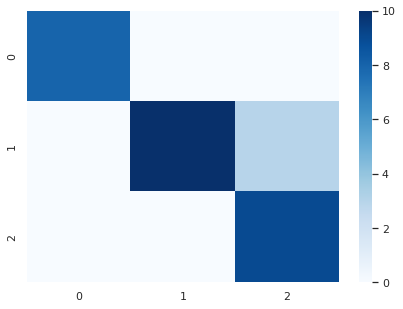

In [ ]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal/len(y_test)
print(f'Test Accuracy: {Accuracy : .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap = 'Blues')

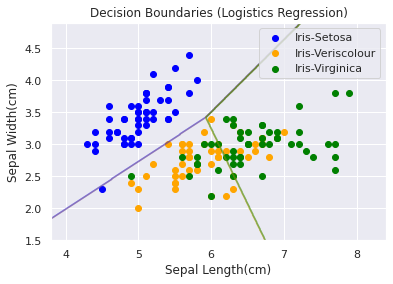

In [ ]:
num_points = 500
x_mesh,y_mesh = get_meshgrid([x[ : , 0].min()- 0.5,x[: ,0].max() + 0.5],
                                                              [x[:, 1].min()-0.5,x[:,1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contour(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(x,y,labels,label_colours,title='Decision Boundaries (Logistics Regression)')
plt.show()

# **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(x_test)

Test Accuracy :  90.00%


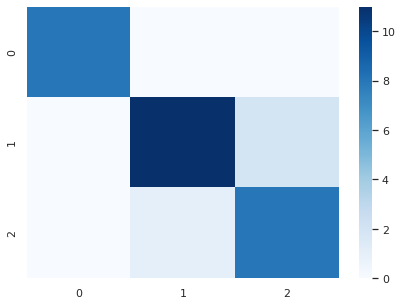

In [ ]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy= diagonal/len(y_test)
print(f'Test Accuracy : {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap='Blues')

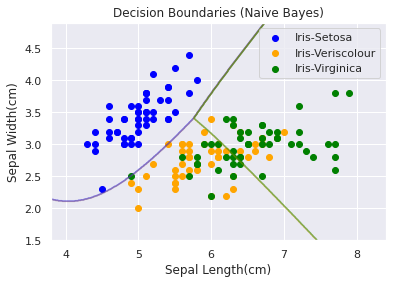

In [ ]:
num_points = 500
x_mesh,y_mesh = get_meshgrid([x[ : , 0].min()- 0.5,x[: ,0].max() + 0.5],
                                                              [x[:, 1].min()-0.5,x[:,1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contour(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(x,y,labels,label_colours,title='Decision Boundaries (Naive Bayes)')
plt.show()

# **SUPPORT VECTOR MACHINE(SVM)**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(x_test)

Test Accuracy:  86.67%


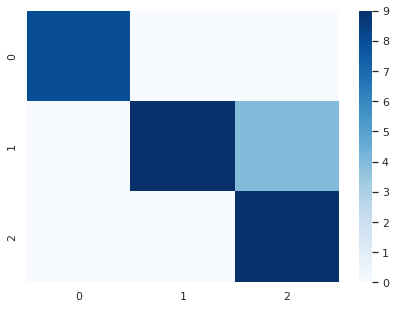

In [ ]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal/len(y_test)
print(f'Test Accuracy: {Accuracy : .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap = 'Blues')

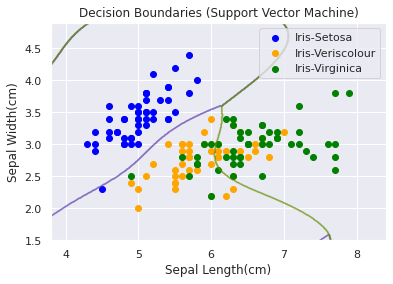

In [ ]:
num_points = 500
x_mesh,y_mesh = get_meshgrid([x[ : , 0].min()- 0.5,x[: ,0].max() + 0.5],
                                                              [x[:, 1].min()-0.5,x[:,1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contour(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(x,y,labels,label_colours,title='Decision Boundaries (Support Vector Machine)')
plt.show()

# **K-NEAREST NEIGHBOURS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)

Test Accuracy:  70.00%


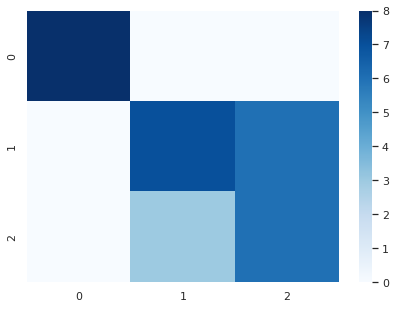

In [ ]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal/len(y_test)
print(f'Test Accuracy: {Accuracy : .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap = 'Blues')

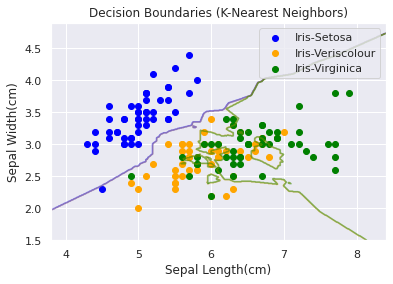

In [ ]:
num_points = 500
x_mesh,y_mesh = get_meshgrid([x[ : , 0].min()- 0.5,x[: ,0].max() + 0.5],
                                                              [x[:, 1].min()-0.5,x[:,1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contour(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(x,y,labels,label_colours,title='Decision Boundaries (K-Nearest Neighbors)')
plt.show()

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)

Test Accuracy:  76.67%


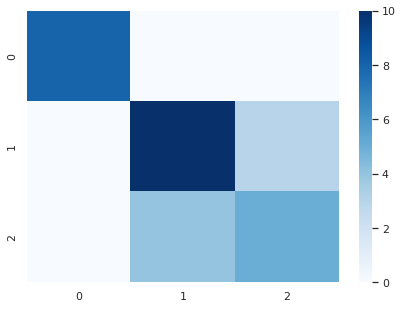

In [ ]:
cm = confusion_matrix(y_test,y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal/len(y_test)
print(f'Test Accuracy: {Accuracy : .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm,cmap = 'Blues')

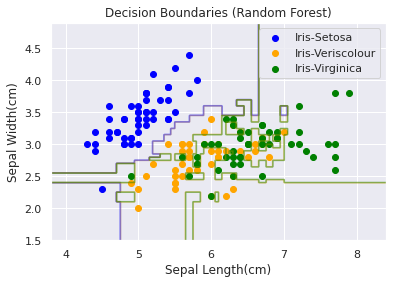

In [ ]:
num_points = 500
x_mesh,y_mesh = get_meshgrid([x[ : , 0].min()- 0.5,x[: ,0].max() + 0.5],
                                                              [x[:, 1].min()-0.5,x[:,1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(),y_mesh.ravel()]).T)).reshape((num_points,num_points))

plt.contour(x_mesh,y_mesh,y_pred,cmap=ListedColormap(label_colours),alpha=0.25)
plot_data(x,y,labels,label_colours,title='Decision Boundaries (Random Forest)')
plt.show()